# Adaboost算法
AdaBoost属于Boosting类集成算法，通过序列化训练多个弱分类器​（如决策树桩），每个分类器专注于修正前序模型的错误，最终以加权投票方式结合所有弱分类器形成强分类器，Boosting主要关注降低偏差。适用于有监督的分类、回归任务
AdaBoost算法就认为综合多个学习器得出的判断要比单独的学习器的判断要更可靠。那么它就要训练得到若干个不同的基学习器，再将它们进行组合。
这里有两个步骤：第一是训练基学习器，基学习器之间必须是不同的，要么是不同的模型，要么模型一样但是参数不一样。要不然一样的学习器只能得到一样的结果，对我们最终的判断没有任何助益。如果我们选用的基学习器都相同的话，那么就要对数据进行一定的操作 (重赋权or重采样) 使得训练得到不同的参数。AdaBoost 采用重赋权法，每训练出一个学习器后，改变样本的权值，使得被分类错误的样本拥有更大的权重，这样在下一轮的训练中将会更加关注这些错分样本，最终得到一个相对好的结果。第二步是基学习器的线性组合，AdaBoost采用加权多数表决，即分类误差率低的基学习器有更大的权重，进行线性组合。

## 1 kmeans聚类任务，同分类任务

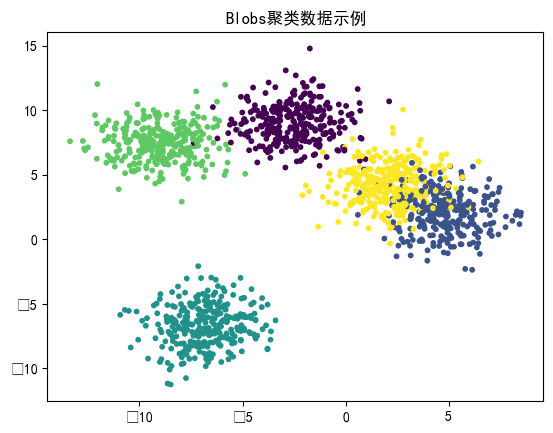

AdaBoost分类器的准确率: 0.94


C:\Users\12998\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


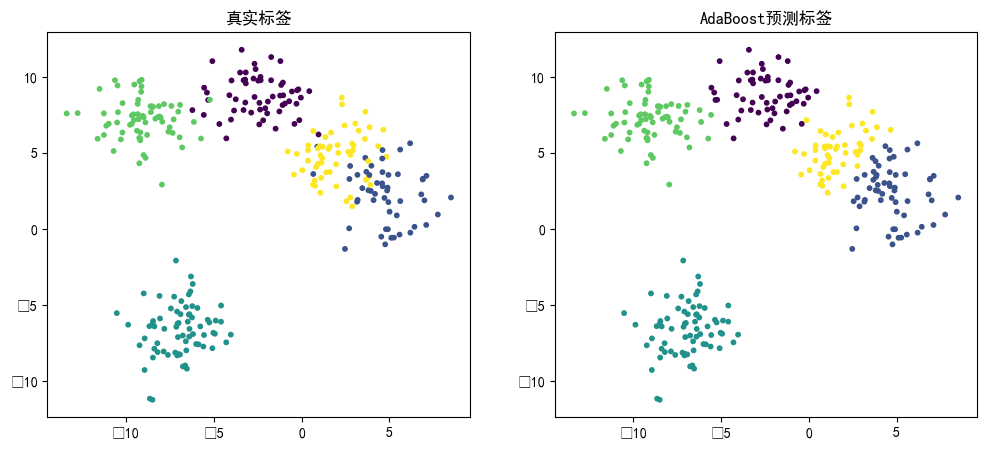

In [14]:
from sklearn import svm
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score


# 生成1500个样本，2个特征，5个中心点
X, y = make_blobs(n_samples=1500, n_features=2, centers=5, 
                 cluster_std=1.5, random_state=42)
# 解决中文乱码问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.scatter(X[:, 0], X[:, 1], c=y, s=10)
plt.title("Blobs聚类数据示例")
plt.show()

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建AdaBoost分类器
# 这里使用决策树作为弱分类器，此外还可以使用逻辑回归、支持向量机等其他弱分类器
# base_estimator = DecisionTreeClassifier(max_depth=1)
# base_estimator = svm.SVC(kernel='linear', probability=True)
base_estimator = LogisticRegression(random_state=42)

# 设置AdaBoost分类器参数，这里设置弱分类器个数为50
ada_boost = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

# 训练模型
ada_boost.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = ada_boost.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost分类器的准确率: {accuracy:.2f}")
# 可视化预测结果
plt.figure(figsize=(12, 5))

# 绘制真实标签
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1],     c=y_test, s=10)
plt.title("真实标签")

# 绘制预测标签
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=10)
plt.title("AdaBoost预测标签")

plt.show()

## 2 回归任务

C:\Users\12998\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


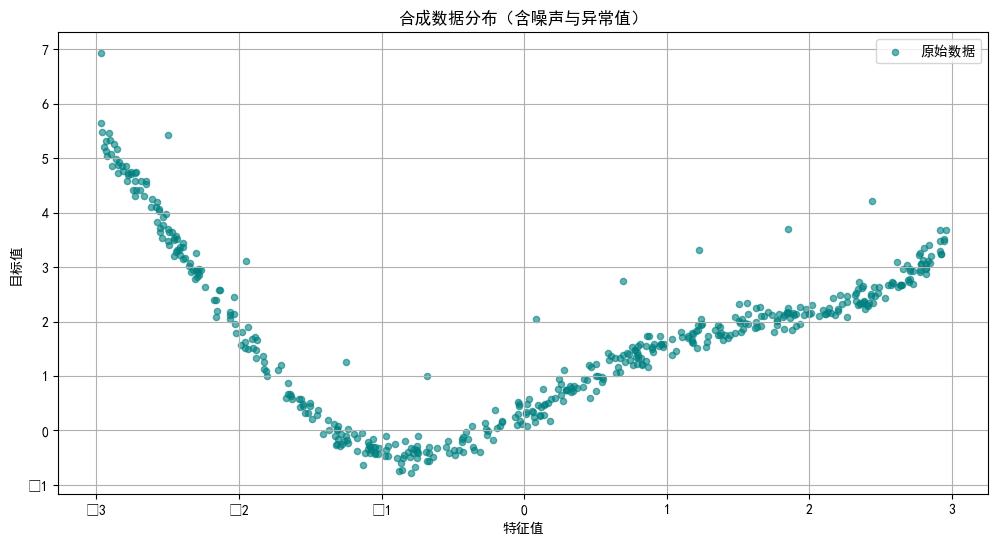

训练进度：

评估指标：
MSE = 0.1119
R² = 0.9510


C:\Users\12998\AppData\Local\Temp\ipykernel_12464\2611961245.py:83: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  plt.tight_layout()
C:\Users\12998\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


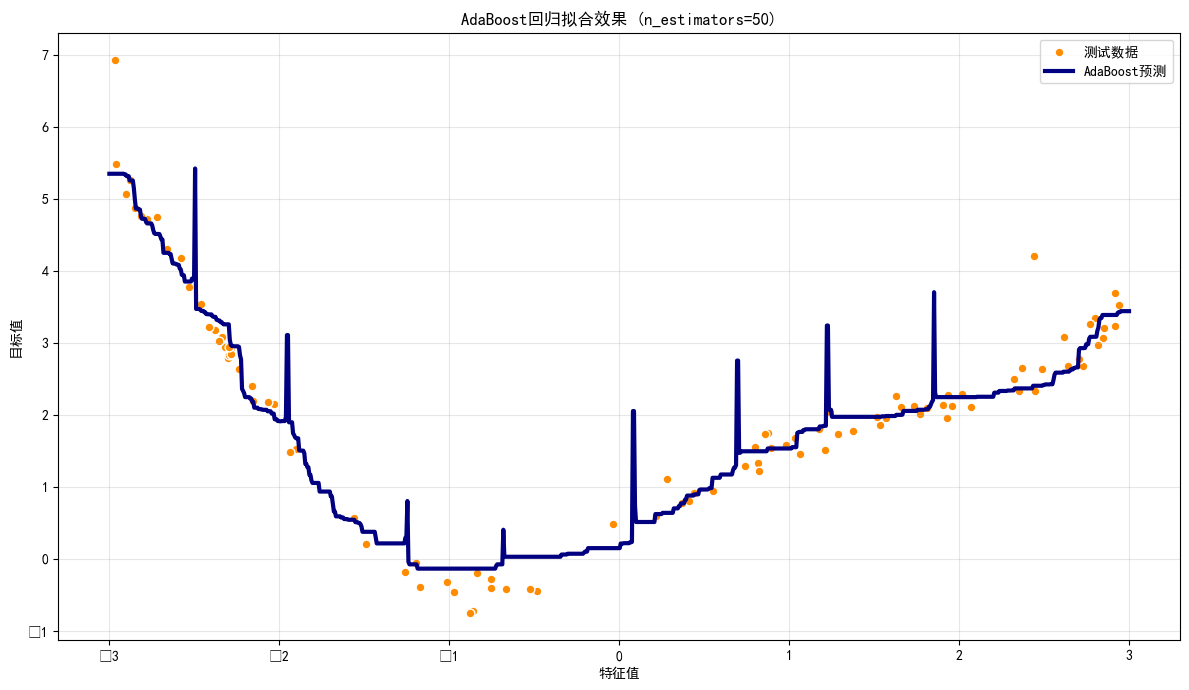

In [15]:
# AdaBoost回归优化示例
# 功能：生成复杂模式数据，演示AdaBoost在非线性回归任务中的应用
# 日期：2025-03-14

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# 1. 生成复杂模拟数据
def generate_complex_data(n_samples=500, noise=0.1):
    """生成含正弦、多项式、指数关系及噪声和异常值的合成数据"""
    np.random.seed(42)
    X = np.sort(6 * np.random.rand(n_samples, 1) - 3, axis=0)
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    y = np.sin(1.5 * X_poly[:, 1]) + 0.5 * X_poly[:, 2] + 0.3 * np.exp(-X_poly[:, 1] ** 2)
    noise = noise * np.random.normal(0, 1, y.shape)
    y += noise
    y[::50] += 1.5  # 添加周期性异常值
    return X, y.ravel()

X, y = generate_complex_data(n_samples=500, noise=0.15)

# 2. 数据预处理与分割
# 可视化数据分布
plt.figure(figsize=(12, 6))
plt.scatter(X, y, s=20, alpha=0.6, c='teal', label='原始数据')
plt.title("合成数据分布（含噪声与异常值）")
plt.xlabel("特征值")
plt.ylabel("目标值")
plt.legend()
plt.grid(True)
plt.show()

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# 3. 模型构建与训练
# 使用决策树回归器作为基学习器
base_estimator = DecisionTreeRegressor(
    max_depth=5,  # 增加树深度捕捉复杂模式
    min_samples_split=10,  # 防止过拟合
    random_state=42
)

# 配置AdaBoost回归器
ada_reg = AdaBoostRegressor(
    estimator=base_estimator,
    n_estimators=50,  # 增加迭代次数
    learning_rate=0.8,  # 调整学习率平衡速度与精度
    loss='square',  # 使用平方误差损失函数
    random_state=42
)

# 训练模型
print("训练进度：")
ada_reg.fit(X_train, y_train)

# 4. 模型评估
y_pred = ada_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\n评估指标：\nMSE = {mse:.4f}\nR² = {r2:.4f}")

# 5. 结果可视化
X_plot = np.linspace(-3, 3, 1000).reshape(-1, 1)
y_plot = ada_reg.predict(X_plot)

plt.figure(figsize=(12, 7))
plt.scatter(X_test, y_test, color='darkorange', s=40, edgecolor='white', label='测试数据')
plt.plot(X_plot, y_plot, color='navy', lw=3, label='AdaBoost预测')
plt.title("AdaBoost回归拟合效果 (n_estimators=50)")
plt.xlabel("特征值")
plt.ylabel("目标值")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()